In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data=pd.read_csv('Combined_News_DJIA.csv')

In [3]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
data2=pd.read_csv("upload_DJIA_table.csv")

In [5]:
#This contains the market Open,High,Low,Close ,Volume and Adj Close 
data2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [6]:
#Combining the data set with the Market price movement 
merge=data.merge(data2,how="inner",on="Date")

In [7]:
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [8]:
import ydata_profiling

C:\Users\shivs\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\shivs\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [9]:
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,2:27]))

In [10]:
headline[1]

'b\'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?\' b\'Bush puts foot down on Georgian conflict\' b"Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia " b\'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired\' b"Olympic opening ceremony fireworks \'faked\'" b\'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?\' b\'Russia angered by Israeli military sale to Georgia\' b\'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people\' b\'Welcome To World War IV! Now In High Definition!\' b"Georgia\'s move, a mistake of monumental proportions " b\'Russia presses deeper into Georgia; U.S. says regime change is goal\' b\'Abhinav Bindra wins first ever Individual Olympic Gold Medal for India\' b\' U.S. ship heads for Arctic to define territory\' b\'Drivers in a Jerusalem taxi station threaten to quit ra

re.sub(pattern, repl, string, count=0, flags=0)

The re.sub() function stands for a substring and returns a string with replaced values. Multiple elements can be replaced using a list when we use this function.

In [11]:
clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i])) #remove b'
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i]) #remove b"
    clean_headline[i]=re.sub("\'",'',clean_headline[i]) #remove \'

Adding the combined and cleaned news back to the merge table

In [12]:
merge['Combined_News'] = clean_headline

In [13]:
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...


In [14]:
#Alternative approach more traditional NLP approach 

In [15]:
samples = list(merge['Combined_News'][:5].values) 

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [17]:
token_index = {}  # builds an index of tokens in the data
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [18]:
max_length = 15

results = np.zeros(shape=(len(samples),   # results will be stored in this array
                          max_length,
                          max(token_index.values()) +1)) 

In [19]:
print("Shape of stored results array:", results.shape)
print("Token index of unique words: \n", token_index)

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1

Shape of stored results array: (5, 15, 888)
Token index of unique words: 
 {'Georgia': 1, 'downs': 2, 'two': 3, 'Russian': 4, 'warplanes': 5, 'as': 6, 'countries': 7, 'move': 8, 'to': 9, 'brink': 10, 'of': 11, 'war"': 12, 'BREAKING:': 13, 'Musharraf': 14, 'be': 15, 'impeached.': 16, 'Russia': 17, 'Today:': 18, 'Columns': 19, 'troops': 20, 'roll': 21, 'into': 22, 'South': 23, 'Ossetia;': 24, 'footage': 25, 'from': 26, 'fighting': 27, '(YouTube)': 28, 'tanks': 29, 'are': 30, 'moving': 31, 'towards': 32, 'the': 33, 'capital': 34, 'Ossetia,': 35, 'which': 36, 'has': 37, 'reportedly': 38, 'been': 39, 'completely': 40, 'destroyed': 41, 'by': 42, 'Georgian': 43, 'artillery': 44, 'fire': 45, 'Afghan': 46, 'children': 47, 'raped': 48, 'with': 49, 'impunity,': 50, 'U.N.': 51, 'official': 52, 'says': 53, '-': 54, 'this': 55, 'is': 56, 'sick,': 57, 'a': 58, 'three': 59, 'year': 60, 'old': 61, 'was': 62, 'and': 63, 'they': 64, 'do': 65, 'nothing"': 66, '150': 67, 'have': 68, 'entered': 69, 'Ossetia

In [20]:
# one hot encoding using keras tokenizer and pad sequencing
X = merge['Combined_News']
encoder = LabelEncoder()
# y = encoder.fit_transform(merge['Combined_News'])
y=merge['Label']
print("shape of input data: ", X.shape)
print("shape of target variable: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

shape of input data:  (1989,)
shape of target variable:  (1989,)


In [21]:
import tqdm
import nltk

import re
from bs4 import BeautifulSoup
import requests
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [22]:


def remove_accented_characters(text):
    text =  unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    return text



def contractions_text(text):
    return contractions.fix(text)

def stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
  
    for w in word_tokens:
        
        if w not in stop_words:
            
            filtered_sentence.append(w)
    return filtered_sentence
    

In [23]:
def preprocessor_engine(text):
    corpus =[]
    for sent in tqdm.tqdm(text):
        sent = remove_accented_characters(sent)
        sent = stop_words(sent)
        corpus.append(sent)
    return corpus

In [24]:
train_data_pro = preprocessor_engine(X_train)

100%|█████████████████████████████████████████████████████████████████████████████| 1591/1591 [00:03<00:00, 416.60it/s]


In [25]:
test_data_pro = preprocessor_engine(X_test)

100%|███████████████████████████████████████████████████████████████████████████████| 398/398 [00:00<00:00, 428.47it/s]


In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
articles_list=[]

In [28]:
cat_array = train_data_pro # array of news articles text in each category
for i in range(len(cat_array)):
    articles_list.append(cat_array[i])

In [29]:
wc1 = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=True,
               stopwords=STOPWORDS)

In [30]:
tokenizer = Tokenizer( oov_token='<UNK>') 
tokenizer.fit_on_texts(train_data_pro) # build the word index


In [31]:
train_sequences = tokenizer.texts_to_sequences(train_data_pro)
test_sequences = tokenizer.texts_to_sequences(test_data_pro)

In [32]:
MAX_SEQUENCE_LENGTH = 424

train_pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
test_pad_sequneces = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')

In [33]:
total_words=len(tokenizer.word_index)

In [34]:
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

In [35]:
model = Sequential()
model.add(Embedding(total_words, 300, input_length=MAX_SEQUENCE_LENGTH ))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 424, 300)          11186400  
                                                                 
 bidirectional (Bidirection  (None, 424, 128)          46720     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 424, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [36]:
model.compile(optimizer="rmsprop",loss='binary_crossentropy',
            metrics=['accuracy'])

In [37]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [38]:
#Finding the Subjitivity and polarity score from the data set
merge['Subjectivity'] = merge['Combined_News'].apply(get_subjectivity)
merge['Polarity'] = merge['Combined_News'].apply(get_polarity)

In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [40]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [41]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Combined_News'])):
    SIA= getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [42]:
merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu

In [43]:
df= merge[['Label','Open', 'High', 'Low','Volume','Subjectivity','Polarity','compound','neg','pos','neu']]
df

,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,0,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...
1984,0,17355.210938,17355.210938,17063.080078,138740000,0.352311,-0.014015,-0.9644,0.148,0.094,0.758
1985,1,17190.509766,17409.720703,17190.509766,112190000,0.352649,0.046560,-0.9571,0.132,0.102,0.767
1986,1,17456.019531,17704.509766,17456.019531,106380000,0.389617,0.052622,-0.9975,0.225,0.091,0.684
1987,1,17712.759766,17930.609375,17711.800781,133030000,0.382566,0.011243,-0.9977,0.202,0.061,0.738


In [44]:
X=df
X = df.drop(['Label'], axis=1).values


In [45]:
y= np.array(df['Label'])

In [46]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0)

In [47]:
model= LinearDiscriminantAnalysis().fit(x_train, y_train)

In [48]:
predict= model.predict(x_test)

predict

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

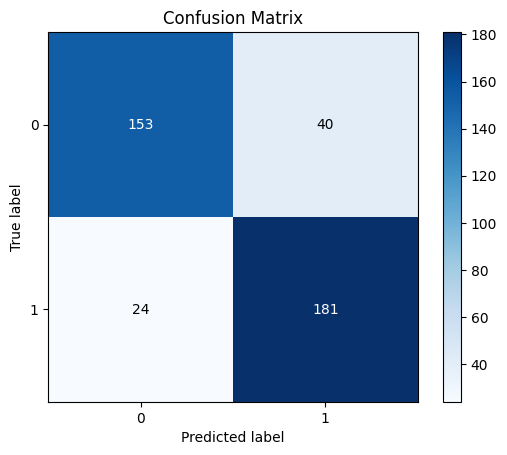

In [49]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,predict);